Unnamed: 0           0.000303
fare_amount          1.000000
pickup_longitude     0.350875
pickup_latitude     -0.178977
dropoff_longitude    0.265894
dropoff_latitude    -0.154255
passenger_count      0.011800
hour                -0.020523
day                  0.000954
month                0.024413
year                 0.121443
Name: fare_amount, dtype: float64


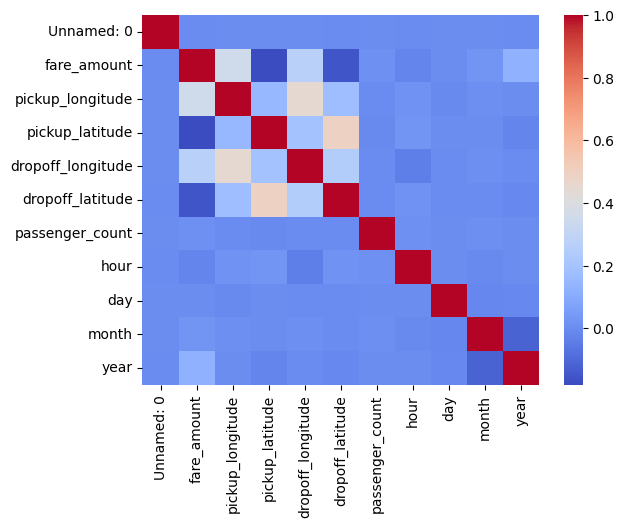


Linear Regression:
R2: 0.21547135543404616
RMSE: 8.307858768009458

Random Forest:
R2: 0.8582235899585344
RMSE: 3.531723458835114


In [10]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# 1. Load & preprocess
df = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\downloads\uber.csv")
df = df.dropna()
df = df[(df['fare_amount'] > 0) & (df['passenger_count'] > 0)]
df = df[(df['pickup_longitude'].between(-80, -70)) &
        (df['dropoff_longitude'].between(-80, -70)) &
        (df['pickup_latitude'].between(35, 45)) &
        (df['dropoff_latitude'].between(35, 45))]

# Extract datetime features
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['year'] = df['pickup_datetime'].dt.year

# 2. Outliers
df = df[df['fare_amount'] < 100]

# 3. Correlation (numeric only)
num_df = df.select_dtypes(include=['number'])
print(num_df.corr()['fare_amount'])
sns.heatmap(num_df.corr(), cmap='coolwarm')
plt.show()

# 4. Train models
X = num_df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year']]
y = num_df['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)

# 5. Evaluation
for name, model in [('Linear Regression', lr), ('Random Forest', rf)]:
    y_pred = model.predict(X_test)
    print(f"\n{name}:")
    print("R2:", r2_score(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
